In [1]:
import pandas as pd
df = pd.read_csv("EV_Stations_data.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Station Name              385 non-null    object
 1   Street Address            385 non-null    object
 2   City                      385 non-null    object
 3   Access Days Time          385 non-null    object
 4   EV Level1 EVSE Num        385 non-null    object
 5   EV Level2 EVSE Num        385 non-null    object
 6   EV DC Fast Count          385 non-null    object
 7   EV Other Info             385 non-null    object
 8   New Georeferenced Column  385 non-null    object
dtypes: object(9)
memory usage: 27.2+ KB
None


# Overview

The EV_Stations_data.csv file contains data about Electric Vehicle (EV) charging stations, including their names, addresses, cities, access times, the number of different types of EVSE (Electric Vehicle Supply Equipment), and additional information. The data is structured in a tabular format with each row representing an EV charging station. There are 9 columns with object data types that shows that there is a need of preprocessing

In [2]:

# Identify missing values

missing_values = df.isnull().sum()
total_values = df.shape[0]
missing_percentage = (missing_values / total_values) * 100

missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print(missing_info)

                          Missing Values  Percentage
Station Name                           0         0.0
Street Address                         0         0.0
City                                   0         0.0
Access Days Time                       0         0.0
EV Level1 EVSE Num                     0         0.0
EV Level2 EVSE Num                     0         0.0
EV DC Fast Count                       0         0.0
EV Other Info                          0         0.0
New Georeferenced Column               0         0.0


# Missing Values Summary
There are no missing values in any of the columns of the dataset.
This indicates that the data is complete and no imputation or data cleaning related to missing values is required.

In [4]:
# Rename the columns
def col_rename(df):
  # Using list comprehension to create a new column list with replaced names
  df.columns = [col.replace(' ', '_') for col in df.columns]
  return df
df = col_rename(df)

print(df.columns)
#df.head()

Index(['Station_Name', 'Street_Address', 'City', 'Access_Days_Time',
       'EV_Level1_EVSE_Num', 'EV_Level2_EVSE_Num', 'EV_DC_Fast_Count',
       'EV_Other_Info', 'New_Georeferenced_Column'],
      dtype='object')


# Renaming Columns
The column names in the dataset were modified to replace spaces with underscores for easier manipulation and reference in the code.
These changes improve the readability and usability of the DataFrame, making it more convenient for further data processing tasks.

In [5]:
#Checking for duplicates 
data=pd.DataFrame(df)
duplicates = data.duplicated(keep=False)

# print the duplicate rows
print(data[duplicates])

Empty DataFrame
Columns: [Station_Name, Street_Address, City, Access_Days_Time, EV_Level1_EVSE_Num, EV_Level2_EVSE_Num, EV_DC_Fast_Count, EV_Other_Info, New_Georeferenced_Column]
Index: []


# Checking for Duplicates
The dataset was checked for duplicate rows, and it was found that there are no duplicates. This ensures the integrity of the data and confirms that each entry is unique.

In [6]:
#print the dataset
df.head()
#The modified dataset with renamed columns is now ready for further exploration and analysis.


,Station_Name,Street_Address,City,Access_Days_Time,EV_Level1_EVSE_Num,EV_Level2_EVSE_Num,EV_DC_Fast_Count,EV_Other_Info,New_Georeferenced_Column
0,BMW OF DARIEN,138-142 Ledge Rd,Darien,24 hours daily,NONE,2,NONE,NONE,POINT (-73.4764687 41.072882)
1,Dunkin’ - Tesla Supercharger,893 E Main St,Meriden,24 hours daily; for Tesla use only,NONE,NONE,8,NONE,POINT (-72.773473 41.527367)
2,Town of Beacon Falls - Commuter Lot,105 N Main St,Beacon Falls,24 hours daily,NONE,1,NONE,NONE,POINT (-73.065583 41.44548100000001)
3,OLD SAYBROOK VW,319 Middlesex Turnpike,Old Saybrook,24 hours daily,NONE,2,NONE,NONE,POINT (-72.3825 41.3102778)
4,Fairfield Rail Station,80 Mill Plain Rd,Fairfield,24 hours daily,NONE,2,NONE,NONE,POINT (-73.264511 41.143125)


In [7]:
#Replacing the NONE value with the 0
df= df.replace('NONE','0')

# changing datatype from object to integers

try:
  for col in ['EV_Level1_EVSE_Num', 'EV_Level2_EVSE_Num', 'EV_DC_Fast_Count']:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Handle conversion errors
except:
  pass 

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Station_Name              385 non-null    object
 1   Street_Address            385 non-null    object
 2   City                      385 non-null    object
 3   Access_Days_Time          385 non-null    object
 4   EV_Level1_EVSE_Num        385 non-null    int64 
 5   EV_Level2_EVSE_Num        385 non-null    int64 
 6   EV_DC_Fast_Count          385 non-null    int64 
 7   EV_Other_Info             385 non-null    object
 8   New_Georeferenced_Column  385 non-null    object
dtypes: int64(3), object(6)
memory usage: 27.2+ KB
None


# Replacing 'NONE' with 0 and Changing Data Types in the Dataset
The dataset has been successfully cleaned, with 'NONE' values replaced by 0 and relevant columns converted to integer types. This preprocessing step is crucial for ensuring the data is ready for further analysis and visualization.

In [8]:
#Calculate Summary Statistics
print(df.describe())

       EV_Level1_EVSE_Num  EV_Level2_EVSE_Num  EV_DC_Fast_Count
count          385.000000          385.000000        385.000000
mean             0.054545            2.036364          0.597403
std              0.489085            1.845244          2.131484
min              0.000000            0.000000          0.000000
25%              0.000000            1.000000          0.000000
50%              0.000000            2.000000          0.000000
75%              0.000000            2.000000          0.000000
max              8.000000           17.000000         16.000000


# Summary Statistics of the EV Stations Dataset
The descriptive statistics indicate that most EV stations have no Level 1 EVSE units or DC fast chargers, while Level 2 EVSE units are more common.
The dataset is now clean and ready for further analysis, and these summary statistics provide a useful overview of the distribution of EVSE units across the stations.

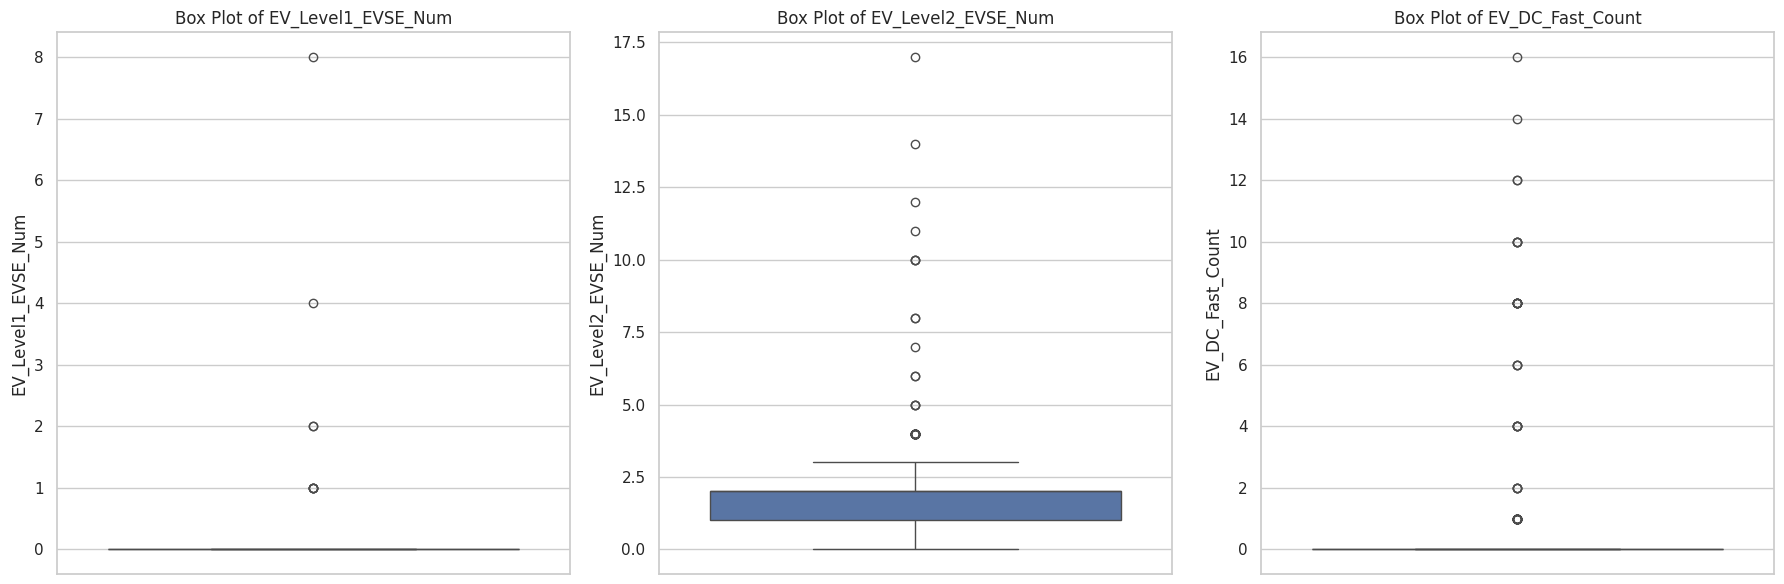

In [10]:
#Box Plots: Unveil statistical summaries such as median, quartiles, and outliers, aiding in data distribution analysis.
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# List of columns to create box plots for
columns = ['EV_Level1_EVSE_Num', 'EV_Level2_EVSE_Num', 'EV_DC_Fast_Count']

# Iterate over the columns and create a box plot for each
for i, col in enumerate(columns):
    sns.boxplot(y=df[col], ax= axs[i])
    axs[i].set_title(f'Box Plot of {col}')
    axs[i].set_ylabel(col)

# Display the plots
plt.tight_layout()
plt.show()

# Interpretation of Box Plots
The box plots highlight the presence of many stations with 0 Level 1 and DC Fast Chargers, indicating a potential gap in slower and fast charging infrastructure. The outliers, especially for Level 2 chargers, suggest that while some stations are well-equipped, the distribution is uneven. This analysis can help in identifying areas where additional charging infrastructure is needed and understanding the current distribution of EV charging stations.

In [26]:
# Group the rows by 'Access_Days_Time' and display the groups
grouped_df = df.groupby('Access_Days_Time')

# Display each group
# for name, group in grouped_df:
#     print(f'\nAccess Days Time: {name}')
#     group.head(10)

In [27]:
# Group the rows by 'Access_Days_Time' and count the number of elements in each group
group_counts = df.groupby('Access_Days_Time').size().reset_index(name='Count')

# Display the counts
print(group_counts.to_string())

                                                                                                                                     Access_Days_Time  Count
0                                                                  10am-8pm M-Th, 10am-6pm F, 10am-5pm Sat, 1pm-5pm Sun (Sunday hours in winter only)      1
1                                                                                                                                     11am-10pm daily      1
2                                                                                                                                      24 hours daily    222
3                                                                                                                        24 hours daily; 2 hour limit      1
4                                                                                                                    24 hours daily; Tesla users only      3
5                                                         

In [31]:
# Assuming you have your data in a DataFrame already

grouped = pd.DataFrame(group_counts)

# Standardize the text to lowercase to handle inconsistencies
grouped['Access_Days_Time'] = grouped['Access_Days_Time'].str.lower()

# Extract common patterns and create new categories
# For example, we can identify different access categories
def categorize_access_days_time(text):
    if 'tesla' in text:
        return 'Tesla'
    elif 'daily' in text or '24 hours' in text:
        return 'Daily'
    elif 'business hours' in text:
        return 'Business Hours'
    elif 'pay lot' in text:
        return 'Pay Lot'
    else:
        return 'Other'

grouped['Category'] = grouped['Access_Days_Time'].apply(categorize_access_days_time)

# Group by the new category and count the occurrences
category_counts = grouped.groupby('Category').sum().reset_index()


# Display the counts
print(category_counts.to_string())

         Category                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Access_Da

# Feature scaling
The data categorizes the "Access_Days_Time" column from the EV charging station dataset into various categories along with their respective counts.
Business Hours 
 includes 42 entries with subcategories such as dealership, garage, lot, park, and store business hours, specifying usage and restrictions for each. 
Daily access times, 
 the largest category with 289 entries, include various daily schedules like 24 hours daily, specific time frames, and special conditions or restrictions for customers, members, or guests. 
The Other category,
  with 27 entries, encompasses varied access times that don't fit the standard daily or business hours, including specific weekly schedules, seasonal variations, and other conditions like school or parking lot hours.
Pay Lot, 
 a smaller category with 5 entries, includes access times for pay lots restricted to garage hours. 
Tesla
 Finally, the Tesla category, with 22 entries, specifies stations available 24 hours daily exclusively for Tesla users. This categorization provides a comprehensive overview of the accessibility of EV charging stations based on different access restrictions and availability.

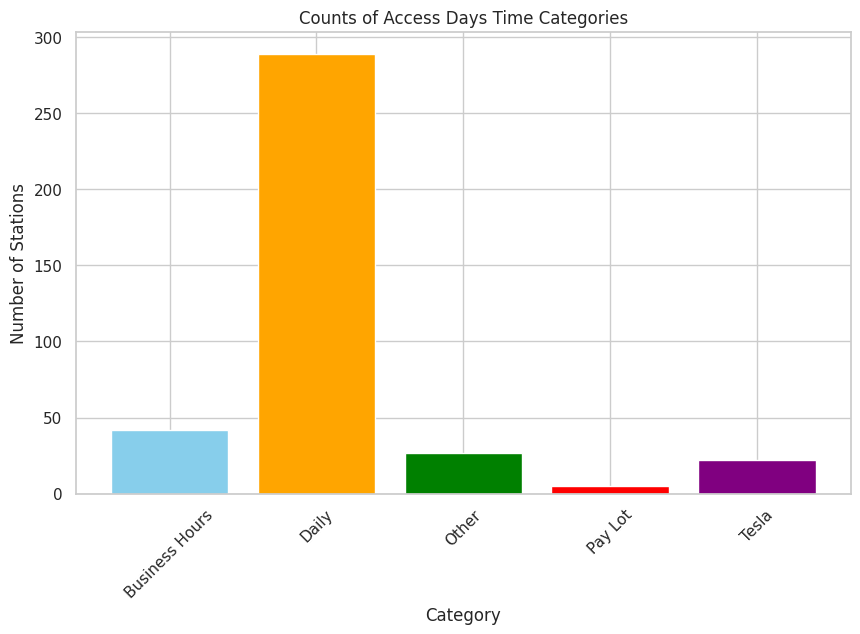

In [32]:
import matplotlib.pyplot as plt

# Define a list of colors for the bars
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown']


# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(category_counts['Category'], category_counts['Count'], color=colors[:len(category_counts)])
plt.xlabel('Category')
plt.ylabel('Number of Stations')
plt.title('Counts of Access Days Time Categories')
plt.xticks(rotation=45)
plt.show()

# Bar Chart: Counts of Access Days Time Categories
The bar chart visualizes the number of EV charging stations categorized by their access days and times. This helps in understanding how the availability of EV charging stations is distributed across different time categories. ie
Business Hours: A relatively small number of stations (around 50) are available only during business hours. These might be located at workplaces or businesses that operate within standard working hours.
Daily: The majority of the stations (around 280) fall under this category, indicating that most stations offer daily access, which might include 24-hour availability. This is beneficial for EV users who need charging facilities at any time.
Other: A smaller portion of the stations (around 30) have varied access times, which might be less predictable for users.
Pay Lot: Very few stations (around 5) are located in pay-to-use parking lots, suggesting that pay-to-use access is not a common practice among the EV stations in this dataset.
Tesla: A moderate number of stations (around 20) are dedicated to Tesla vehicles, reflecting Tesla’s strategy of building a proprietary charging network.

The bar chart provides a clear visual representation of the distribution of EV charging stations based on their access times. The dominance of daily access stations is evident, indicating a user-friendly charging infrastructure that accommodates flexible and continuous usage. This insight can guide future infrastructure development to ensure that EV charging is accessible and convenient for all users.

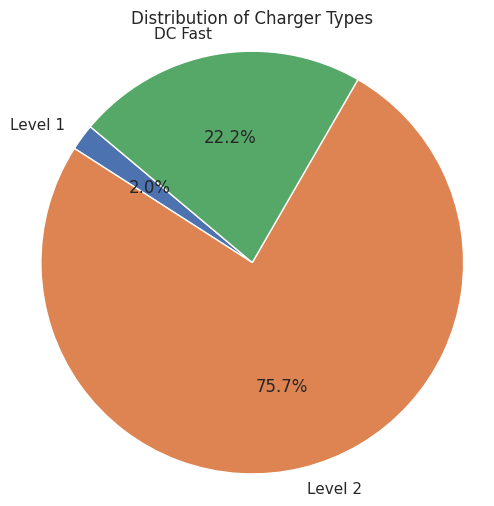

In [35]:
import pandas as pd
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import seaborn as sns

#suming up the levels
level1_count = df['EV_Level1_EVSE_Num'].sum()
level2_count = df['EV_Level2_EVSE_Num'].sum()
dc_fast_count = df['EV_DC_Fast_Count'].sum()

counts = [level1_count, level2_count, dc_fast_count]
labels = ['Level 1', 'Level 2', 'DC Fast']

# Create a pie chart using Matplotlib
plt.figure(figsize=(6, 6))  # Adjust figure size as desired
plt.pie(counts, labels=labels, autopct="%1.1f%%", startangle=140)  
plt.title('Distribution of Charger Types')
plt.axis('equal')  # Equal aspect ratio for a circular pie chart
plt.show()

# Distribution of Charger Types
The pie chart above represents the distribution of different types of electric vehicle (EV) chargers across the dataset. The chart is divided into three segments, each representing a different type of EV charger:
Level 1 Chargers: These chargers are depicted in blue and constitute 2.0% of the total chargers.
Level 2 Chargers: Represented in orange, they make up the majority of the chargers, accounting for 75.7% of the total.
DC Fast Chargers: Shown in green, these chargers represent 22.2% of the total.

Key Insights
Dominance of Level 2 Chargers: The largest segment of the pie chart is for Level 2 chargers, which suggests that most charging stations provide this type of charging. Level 2 chargers are typically faster than Level 1 chargers and are widely used in public and residential areas.
Significant Presence of DC Fast Chargers: The second-largest segment is for DC Fast chargers. These chargers provide rapid charging and are essential for reducing charging times significantly, making them suitable for long-distance travel and highway locations.
Minimal Level 1 Chargers: Level 1 chargers make up a very small portion of the total chargers. These chargers are the slowest and are more commonly found in residential settings where charging overnight is convenient.

summary
The pie chart effectively highlights the current landscape of EV charging infrastructure. With the predominance of Level 2 chargers, there is an indication that while rapid charging is important, the more moderate charging speed of Level 2 chargers meets most needs. However, the substantial presence of DC Fast chargers underscores the growing importance of reducing charging time for users. The small share of Level 1 chargers suggests they are less favored for public charging infrastructure but remain relevant for private use.

         Category  EV_Level1_EVSE_Num  EV_Level2_EVSE_Num  EV_DC_Fast_Count
0  Business Hours                   0                  63                10
1           Daily                  13                 616                43
2           Other                   0                  74                 0
3         Pay Lot                   8                  31                 1
4           Tesla                   0                   0               176


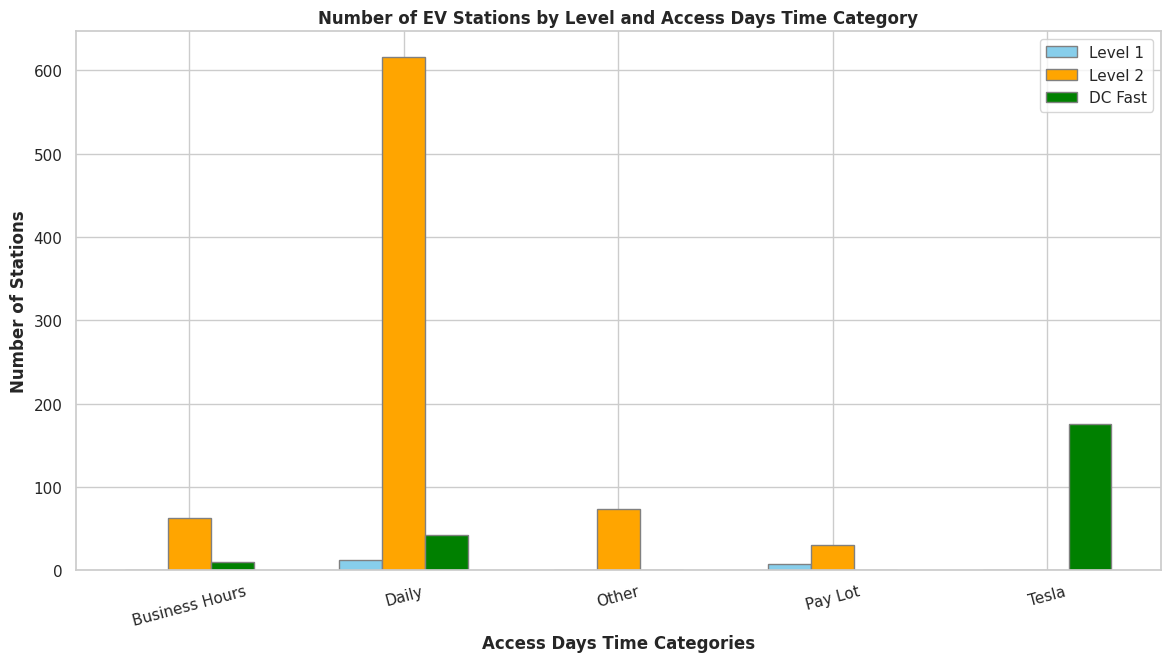

In [36]:


df['Access_Days_Time'] = df['Access_Days_Time'].str.lower()

df['Category'] = df['Access_Days_Time'].apply(categorize_access_days_time)

# Group by the new category and sum the occurrences
category_counts = df.groupby('Category')[['EV_Level1_EVSE_Num', 'EV_Level2_EVSE_Num', 'EV_DC_Fast_Count']].sum().reset_index()

# Display the counts
print(category_counts)

# Define categories and levels
categories = category_counts['Category']
levels = ['EV_Level1_EVSE_Num', 'EV_Level2_EVSE_Num', 'EV_DC_Fast_Count']

# Define bar width and positions
bar_width = 0.2
r1 = np.arange(len(categories))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the plot
plt.figure(figsize=(14, 7))

# Plotting each level
plt.bar(r1, category_counts['EV_Level1_EVSE_Num'], color='skyblue', width=bar_width, edgecolor='grey', label='Level 1')
plt.bar(r2, category_counts['EV_Level2_EVSE_Num'], color='orange', width=bar_width, edgecolor='grey', label='Level 2')
plt.bar(r3, category_counts['EV_DC_Fast_Count'], color='green', width=bar_width, edgecolor='grey', label='DC Fast')

# Adding labels and title
plt.xlabel('Access Days Time Categories', fontweight='bold')
plt.ylabel('Number of Stations', fontweight='bold')
plt.title('Number of EV Stations by Level and Access Days Time Category', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(categories))], categories, rotation=15)
plt.legend()

# Show the plot
plt.show()

# Number of EV Stations by Level and Access Days Time Category
The bar chart above illustrates the distribution of electric vehicle (EV) stations categorized by the type of charger (Level 1, Level 2, DC Fast) and access days time categories. The access days time categories are classified as Business Hours, Daily, Other, Pay Lot, and Tesla.
Key Insights
Daily Access: The majority of EV stations fall under the 'Daily' access category, with a substantial number of Level 2 chargers (over 600) and a notable presence of DC Fast chargers.
Business Hours: EV stations available during business hours predominantly feature Level 2 chargers, followed by a smaller number of DC Fast and Level 1 chargers.
Tesla Stations: Tesla chargers are predominantly DC Fast chargers, with no significant presence of Level 1 or Level 2 chargers in this category.
Other Categories: The 'Other' and 'Pay Lot' categories have a modest number of Level 2 chargers, with minimal representation of Level 1 and DC Fast chargers.
summary:
The bar chart effectively highlights the distribution of EV chargers based on access time and charger type. The predominance of Level 2 chargers in the 'Daily' category suggests a widespread availability of moderately fast chargers for everyday use. Tesla's reliance on DC Fast chargers indicates a focus on rapid charging for its users. The lower numbers in categories like 'Business Hours' and 'Pay Lot' suggest these areas might benefit from an increased number of chargers to cater to specific user needs.


In [40]:
# df.head(100)

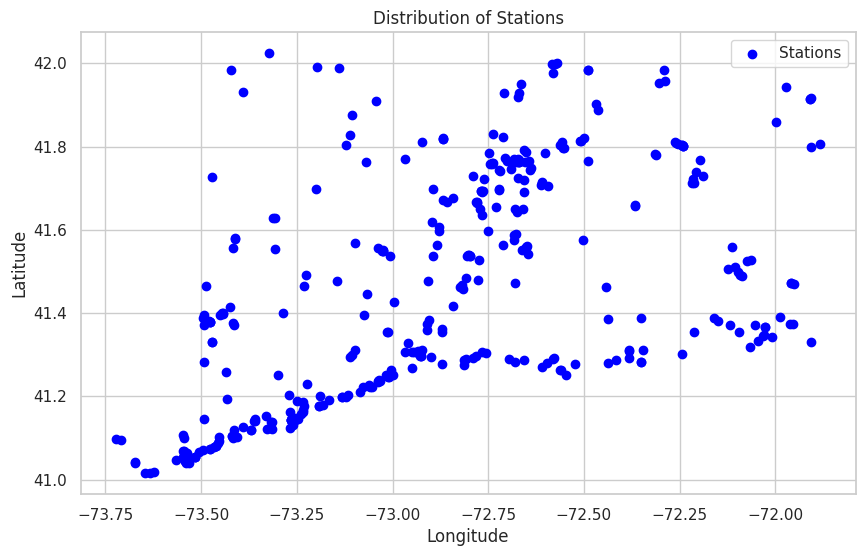

In [39]:

import pandas as pd
import matplotlib.pyplot as plt
from shapely import wkt

# Convert the New_Georeferenced_Column to latitude and longitude
df['geometry'] = df['New_Georeferenced_Column'].apply(wkt.loads)
df['Latitude'] = df['geometry'].apply(lambda geom: geom.y)
df['Longitude'] = df['geometry'].apply(lambda geom: geom.x)



# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c='blue', marker='o', label='Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribution of Stations')
plt.legend()
plt.grid(True)
plt.show()

In [91]:

import numpy as np

# Calculate the bounding box
min_lat, max_lat = df['Latitude'].min(), df['Latitude'].max()
min_lon, max_lon = df['Longitude'].min(), df['Longitude'].max()

# Function to calculate the distance between two lat/lon points in miles
def haversine(lon1, lat1, lon2, lat2):
    R = 3958.8  # Earth radius in miles
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

# Calculate the width and height of the bounding box in miles
width = haversine(min_lon, min_lat, max_lon, min_lat)
height = haversine(min_lon, min_lat, min_lon, max_lat)

# Calculate the total area in square miles
total_area_sq_miles = width * height

# Count the number of stations
num_stations = len(df)

# Calculate the density of stations per square mile
density_stations_per_sq_mile = num_stations / total_area_sq_miles

# Print the results
print(f'Total area: {total_area_sq_miles:.2f} square miles')
print(f'Number of stations: {num_stations}')
print(f'Density of stations: {density_stations_per_sq_mile:.2f} stations per square mile')

Total area: 6689.14 square miles
Number of stations: 385
Density of stations: 0.06 stations per square mile


In [83]:
df.head()

,Station_Name,Street_Address,City,Access_Days_Time,EV_Level1_EVSE_Num,EV_Level2_EVSE_Num,EV_DC_Fast_Count,EV_Other_Info,New_Georeferenced_Column
0,BMW OF DARIEN,138-142 Ledge Rd,Darien,24 hours daily,0,2,0,0,POINT (-73.4764687 41.072882)
1,Dunkin’ - Tesla Supercharger,893 E Main St,Meriden,24 hours daily; for Tesla use only,0,0,8,0,POINT (-72.773473 41.527367)
2,Town of Beacon Falls - Commuter Lot,105 N Main St,Beacon Falls,24 hours daily,0,1,0,0,POINT (-73.065583 41.44548100000001)
3,OLD SAYBROOK VW,319 Middlesex Turnpike,Old Saybrook,24 hours daily,0,2,0,0,POINT (-72.3825 41.3102778)
4,Fairfield Rail Station,80 Mill Plain Rd,Fairfield,24 hours daily,0,2,0,0,POINT (-73.264511 41.143125)


In [85]:

#Availability and Count of Charging Levels
# count occurrences of each EV level
level1_count = df[df['EV_Level1_EVSE_Num'] != 0].shape[0]
level2_count = df[df['EV_Level2_EVSE_Num'] != 0].shape[0]
dc_fast_count = df[df['EV_DC_Fast_Count'] != 0].shape[0]

# Print the counts
print(f'EV Level 1 Count: {level1_count}')
print(f'EV Level 2 Count: {level2_count}')
print(f'EV DC Fast Count: {dc_fast_count}')

EV Level 1 Count: 9
EV Level 2 Count: 341
EV DC Fast Count: 54


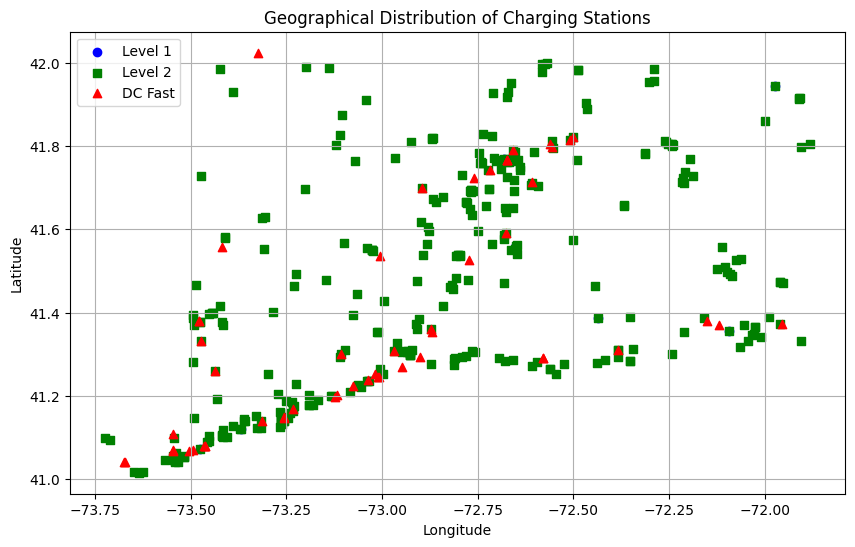

In [88]:
# Convert the New_Georeferenced_Column to latitude and longitude
df['geometry'] = df['New_Georeferenced_Column'].apply(wkt.loads)
df['Latitude'] = df['geometry'].apply(lambda geom: geom.y)
df['Longitude'] = df['geometry'].apply(lambda geom: geom.x)

# Create separate DataFrames for each type of charging level
df_level1 = df[df['EV_Level1_EVSE_Num'] != 0]
df_level2 = df[df['EV_Level2_EVSE_Num'] != 0]
df_dc_fast = df[df['EV_DC_Fast_Count'] != 0]

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(df_level1['Longitude'], df_level1['Latitude'], c='blue', marker='o', label='Level 1')
plt.scatter(df_level2['Longitude'], df_level2['Latitude'], c='green', marker='s', label='Level 2')
plt.scatter(df_dc_fast['Longitude'], df_dc_fast['Latitude'], c='red', marker='^', label='DC Fast')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Charging Stations')
plt.legend()
plt.grid(True)
plt.show()

In [93]:
#Findind the number of stations with in different cities
city_counts = df['City'].value_counts()

# Print the city and their counts
print(city_counts.to_string())

City
Stamford              21
Hartford              20
Fairfield             20
New Haven             13
Danbury               12
Milford               11
Westport              10
Middletown             9
New Britain            9
West Hartford          8
Groton                 8
Darien                 8
Greenwich              8
Norwalk                8
Madison                7
Meriden                6
Branford               6
Old Saybrook           6
Manchester             6
Waterbury              6
Norwich                5
Storrs                 5
East Hartford          5
Wallingford            5
Bridgeport             5
Stratford              4
Glastonbury            4
Enfield                4
Mansfield              4
North Haven            3
Ridgefield             3
Stafford Springs       3
Newington              3
Plainville             3
Torrington             3
New Milford            3
Guilford               3
Mystic                 3
Shelton                3
Putnam              

count
1-3 stations     90
4-7 stations     15
7-11 stations     9
12+ stations      5
Name: count, dtype: int64


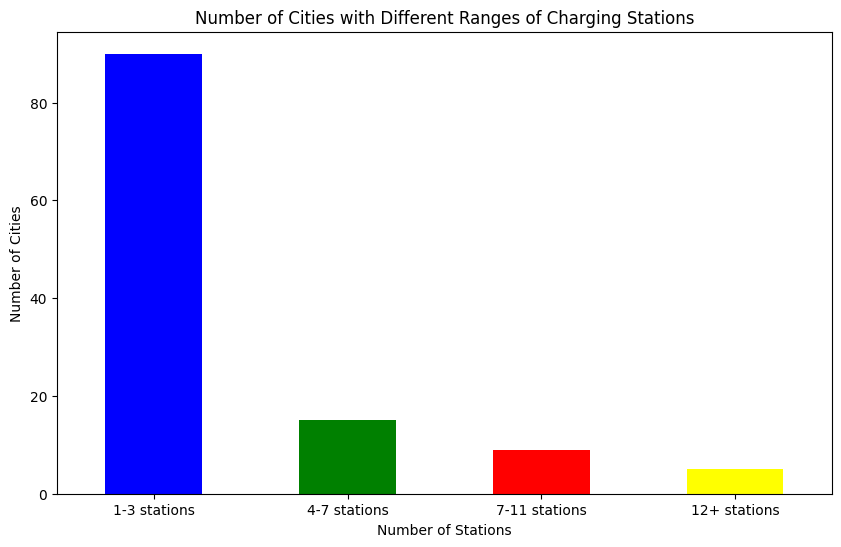

In [95]:
# Converting  the dictionary to a DataFrame
city_counts = pd.Series(city_counts)

# Define bins for the ranges
bins = [0, 3, 7, 11, city_counts.max()]
labels = ['1-3 stations', '4-7 stations', '7-11 stations','12+ stations']

# Cut the city counts into the specified bins
city_bins = pd.cut(city_counts, bins=bins, labels=labels, right=True)

# Count the number of cities in each bin
bin_counts = city_bins.value_counts().sort_index()

# Print the bin counts
print(bin_counts)

# Plot the data
plt.figure(figsize=(10, 6))
bin_counts.plot(kind='bar', color=['blue', 'green', 'red', 'yellow'])
plt.xlabel('Number of Stations')
plt.ylabel('Number of Cities')
plt.title('Number of Cities with Different Ranges of Charging Stations')
plt.xticks(rotation=0)
plt.show()

                   City  Count
0              Stamford     21
1              Hartford     20
2             Fairfield     20
3             New Haven     13
4               Danbury     12
5               Milford     11
6              Westport     10
7            Middletown      9
8           New Britain      9
9         West Hartford      8
10               Groton      8
11               Darien      8
12            Greenwich      8
13              Norwalk      8
14              Madison      7
15              Meriden      6
16             Branford      6
17         Old Saybrook      6
18           Manchester      6
19            Waterbury      6
20              Norwich      5
21               Storrs      5
22        East Hartford      5
23          Wallingford      5
24           Bridgeport      5
25            Stratford      4
26          Glastonbury      4
27              Enfield      4
28            Mansfield      4
29          North Haven      3
30           Ridgefield      3
31     S

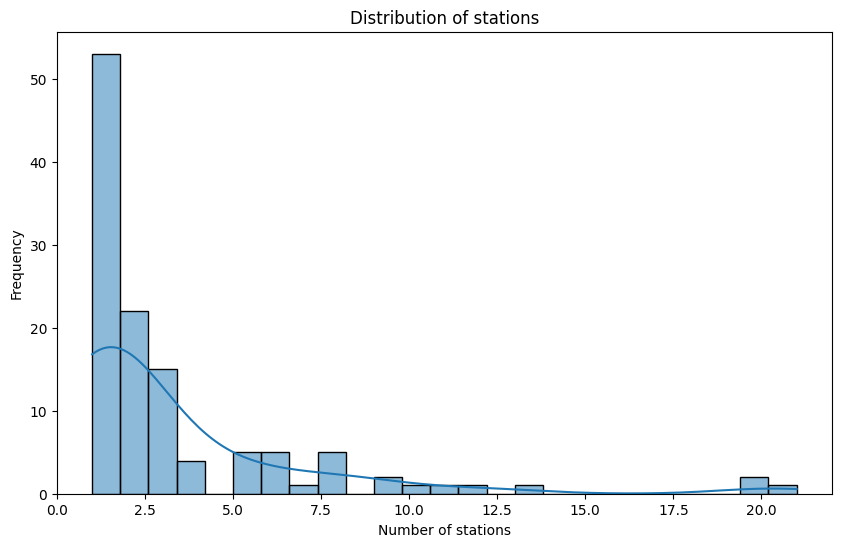

In [99]:
import seaborn as sns

# Convert the Series to a DataFrame for easier handling
data = city_counts.reset_index()
data.columns = ['City', 'Count']

print(data.to_string())

# Visualize the distribution

plt.figure(figsize=(10, 6))
sns.histplot(data['Count'].dropna(), kde=True)
plt.title('Distribution of stations')
plt.xlabel('Number of stations')
plt.ylabel('Frequency')
plt.show()

      Station_Category  Count
0         Level 2 only    322
1         DC Fast only     42
2  Level 2 and DC Fast     12
3        Level 1 and 2      7
4         Level 1 only      2


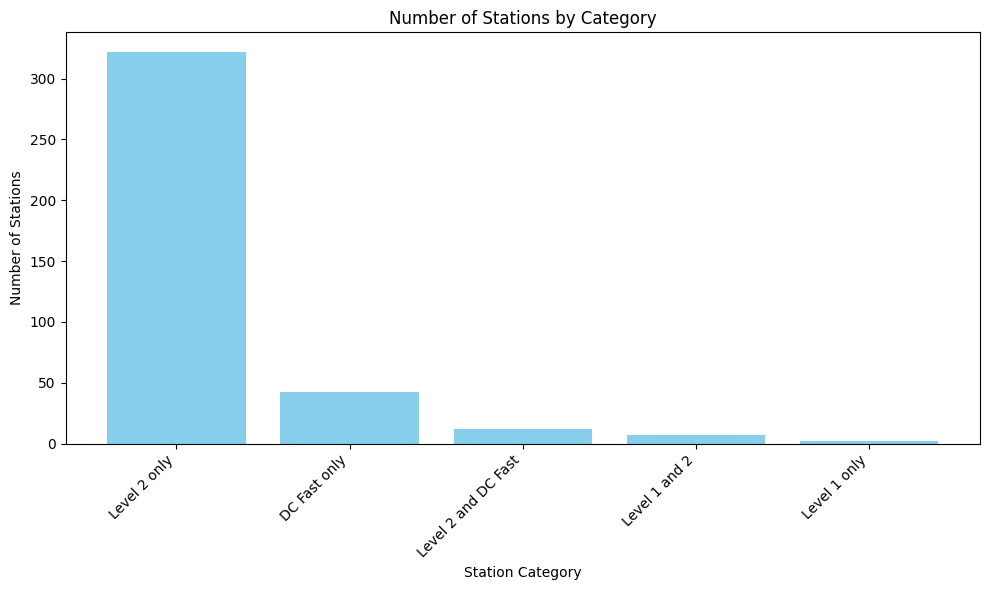

In [103]:
# Create a new column to categorize the stations
def categorize_station(row):
    level1 = row['EV_Level1_EVSE_Num'] > 0
    level2 = row['EV_Level2_EVSE_Num'] > 0
    dc_fast = row['EV_DC_Fast_Count'] > 0
    
    if level1 and not level2 and not dc_fast:
        return 'Level 1 only'
    elif not level1 and level2 and not dc_fast:
        return 'Level 2 only'
    elif not level1 and not level2 and dc_fast:
        return 'DC Fast only'
    elif level1 and level2 and not dc_fast:
        return 'Level 1 and 2'
    elif level1 and not level2 and dc_fast:
        return 'Level 1 and DC Fast'
    elif not level1 and level2 and dc_fast:
        return 'Level 2 and DC Fast'
    elif level1 and level2 and dc_fast:
        return 'Level 1, 2, and DC Fast'
    else:
        return 'Other'

df['Station_Category'] = df.apply(categorize_station, axis=1)

# Count the number of stations in each category
category_counts = df['Station_Category'].value_counts().reset_index()
category_counts.columns = ['Station_Category', 'Count']

print(category_counts)

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(category_counts['Station_Category'], category_counts['Count'], color='skyblue')
plt.title('Number of Stations by Category')
plt.xlabel('Station Category')
plt.ylabel('Number of Stations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


->The vast majority of the stations fall under the "Level 2 only" category, indicating that Level 2 chargers are the most common type of EV charger available.
->A smaller number of stations provide "DC Fast only" chargers. This indicates that while DC Fast chargers are available, they are not as prevalent as Level 2 chargers.
->There are even fewer stations that offer both "Level 2 and DC Fast" chargers. This suggests that combined charging options are less common
->Stations that provide both "Level 1 and 2" chargers are minimal. This could be because Level 1 chargers are generally slower and less preferred by users compared to Level 2 chargers.

NB: There is no Station that provides the all three types of chargers in the State

# Actionable Insights
Increase DC Fast Chargers: With the rising number of EVs and the demand for faster charging options, increasing the number of DC Fast chargers could enhance user convenience and attract more EV users.


